#### pyBlockSeis - Block Choice Seismic Analysis in Python

1. Input data: time series
2. Input parameters (Parameter object)
3. Functions
  - compute continuous wavelet transform (CWT)
  - apply a block bandpass
  - calculate noise model and threshold function
  - apply SNR detection method
  - apply hard thresholding to the noise (noise removal)
  - apply soft thresholding to the noise (noise removal)
  - apply hard thresholding to the signal (signal removal)
  - apply soft thresholding to the signal (signal removal)
  - compute the inverse CWT
  
Planned updates:
1. Computation in parallel (e.g. https://deepgraph.readthedocs.io/en/latest/tutorials/pairwise_correlations.html)

### Acknowledgements
- Python adpation of the Matlab software Block Choice Seismic Analysis (BCseis, version 1.1) by Charles A. Langston and S. Mostafa Mousavi.
- Forward and inverse CWTs functions based on the Synchrosqueezing Toolbox V1.21 by Eugene Brevdo and Gaurav Thakur.  (https://github.com/ebrevdo/synchrosqueezing).

In [1]:
import sys
sys.path.append("src")

import pyblockseis as bcs
from obspy.core import read
import matplotlib.pyplot as plt

import timeit

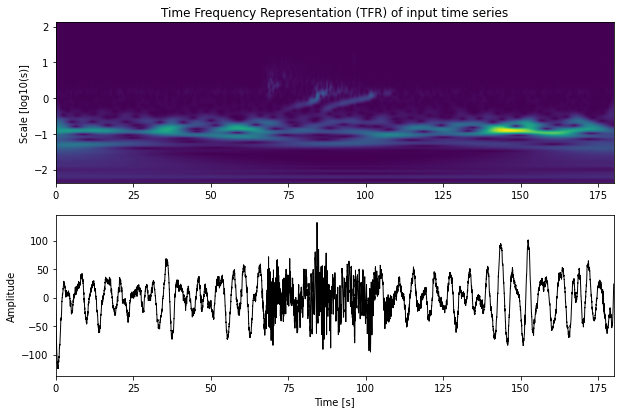

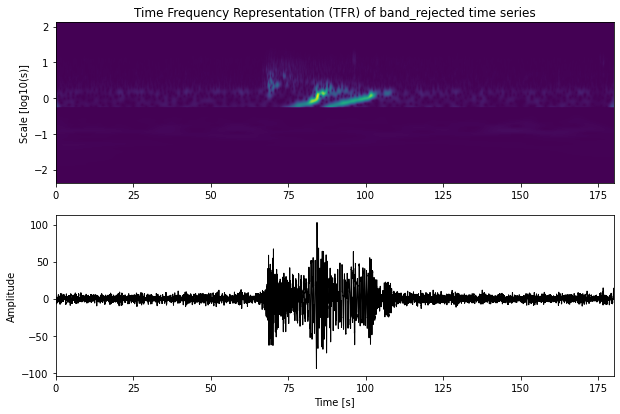

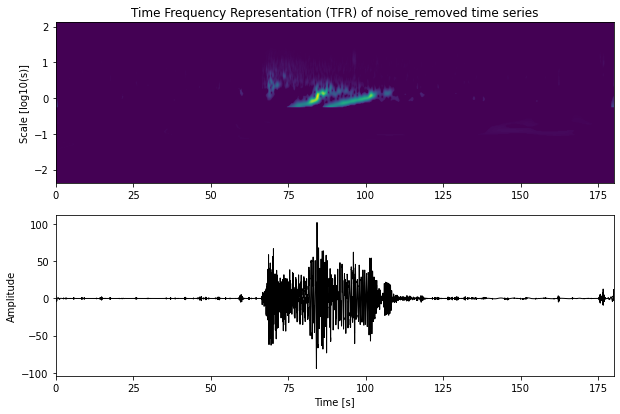

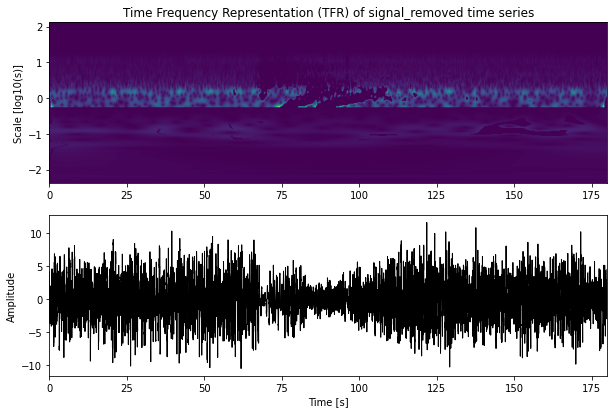

Run took 0.0029 seconds


In [2]:
# Read example data from BCseis
sacfile = "/Users/chiang4/Work/NNSA/LYNM/denoiser/bc_v1.1/data/5014.YW.0.sp0011.DPZ"
#sacfile = "/Users/chiang4/Work/NNSA/LYNM/denoiser/bc_v1.1/data/*DPZ" # multiple traces
st = read(sacfile)

start = timeit.timeit()
# Use the default values to process time series
# Refer to :class:pyblockseis.Parameter docstring for details
params = bcs.Parameter(block_threshold=1.0, noise_threshold="hard", signal_threshold="hard")

# Initalize the block processing module
block = bcs.Block(choice=params, data=st)

# Run the denoiser
block.run()
end = timeit.timeit()

# Plot results
block.plot("input")
block.plot("band_rejected")
block.plot("noise_removed")
block.plot("signal_removed")
print("Run took %.4f seconds"%(end - start))

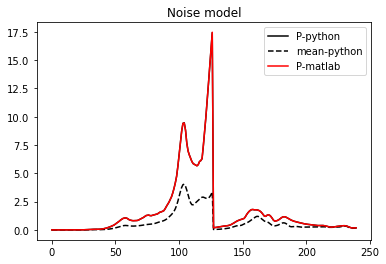

In [3]:
import numpy as np
plt.figure()
plt.title("Noise model")
plt.plot(block.data[0].wavelet.P,"k",label="P-python")
plt.plot(block.data[0].wavelet.M,"k--",label="mean-python")
matP = np.loadtxt("tmp/P.txt")
plt.plot(matP,"r",label="P-matlab")
plt.legend()

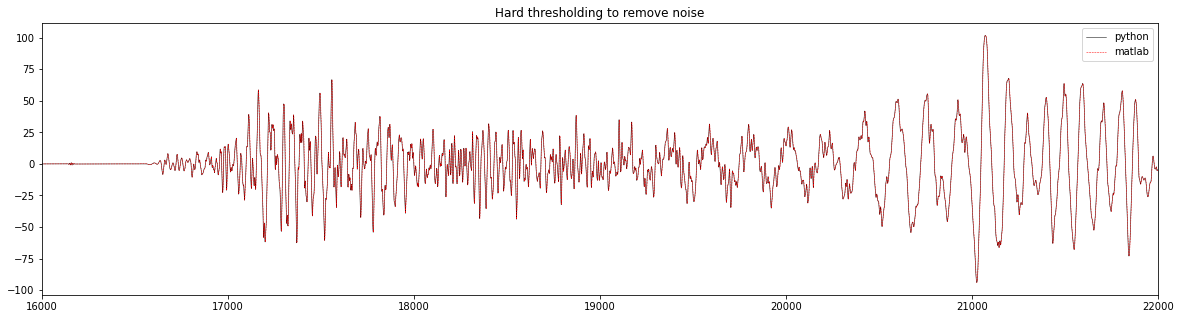

In [4]:
plt.figure(figsize=(20,5))
plt.title("Hard thresholding to remove noise")
plt.plot(block.data[0].wavelet.icwt["noise_removed"],"k",linewidth=0.5,label="python")
trace = read("tmp/icwtblock_noisehard.sac",format="SAC")[0]
plt.plot(trace.data,"r--",linewidth=0.5,label="matlab")
plt.xlim([16000,22000])
plt.legend()

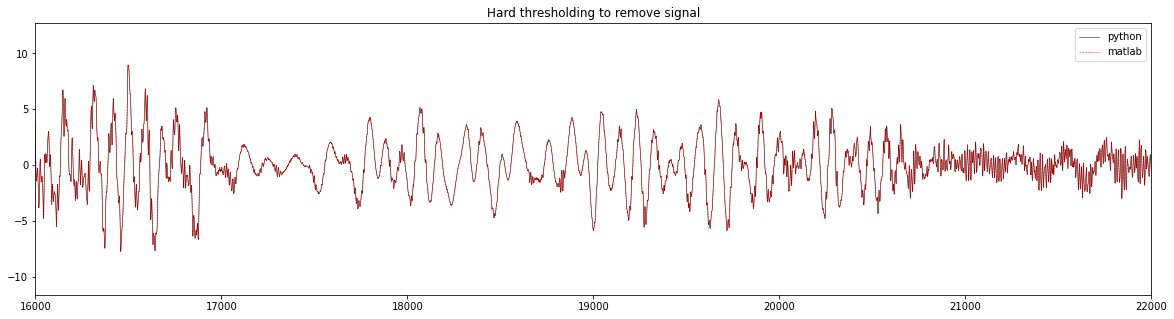

In [5]:
plt.figure(figsize=(20,5))
plt.title("Hard thresholding to remove signal")
plt.plot(block.data[0].wavelet.icwt["signal_removed"],"k",linewidth=0.5,label="python")
trace = read("tmp/icwtblock_signalhard.sac",format="SAC")[0]
plt.plot(trace.data,"r--",linewidth=0.5,label="matlab")
plt.xlim([16000,22000])
plt.legend()

In [6]:
block.params.noise_threshold="soft"
block.params.signal_threshold="soft"
block.run()

Apply new noise thresholding.
Apply new signal thresholding.


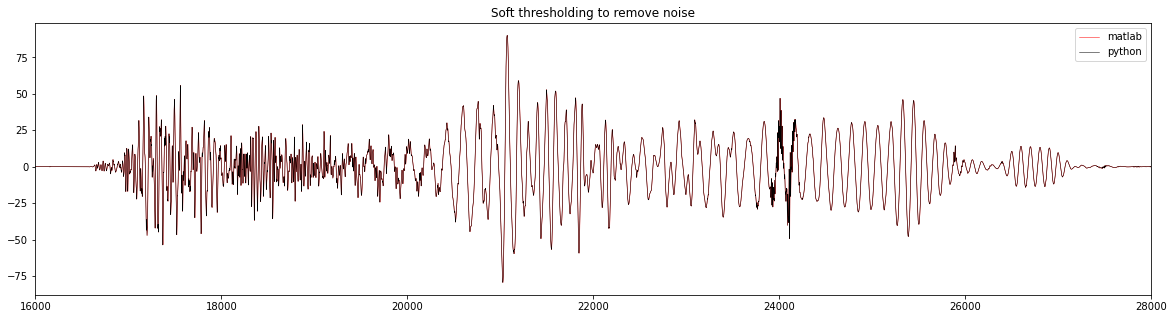

In [7]:
plt.figure(figsize=(20,5))
plt.title("Soft thresholding to remove noise")
trace = read("tmp/icwtblock_noisesoft.sac",format="SAC")[0]
plt.plot(trace.data,"r-",linewidth=0.5,label="matlab")
plt.plot(block.data[0].wavelet.icwt["noise_removed"],"k",linewidth=0.5,label="python")
plt.xlim([16000,28000])
plt.legend()

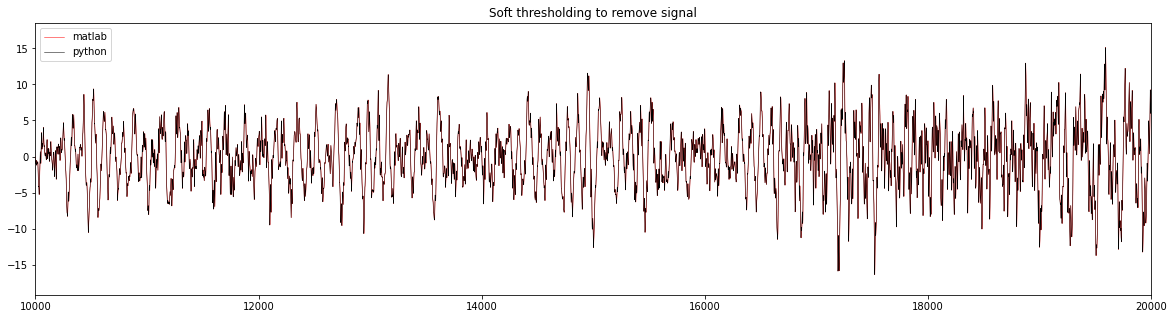

In [9]:
plt.figure(figsize=(20,5))
plt.title("Soft thresholding to remove signal")
trace = read("tmp/icwtblock_signalsoft.sac",format="SAC")[0]
plt.plot(trace.data,"r-",linewidth=0.5,label="matlab")
plt.plot(block.data[0].wavelet.icwt["signal_removed"],"k",linewidth=0.5,label="python")
plt.xlim([10000,20000])
plt.legend()

Apply new noise model.
Apply new noise thresholding.
Apply new signal thresholding.


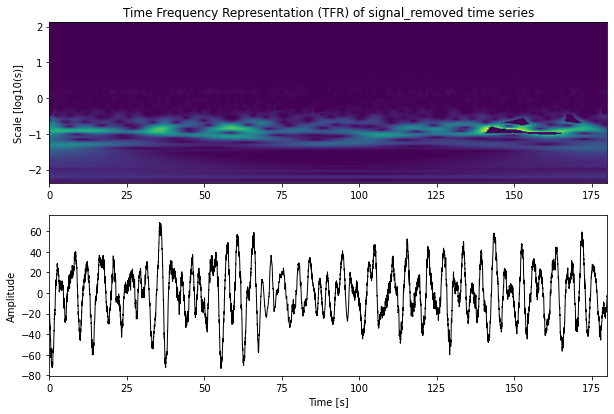

In [6]:
# Test update functions
block.params.nsigma_method = "donoho"
block.params.bandpass_blocking = False
block.params.estimate_noise = True
block.params.snr_detection = True
block.run()
block.plot("signal_removed")

In [10]:
import pyasdf

In [51]:
evid = 578449
ds = pyasdf.ASDFDataSet("../../bondar_2015_data/%s/%s.h5"%(evid,evid))

In [58]:
for station in ds.waveforms:
    print(station._station_name)
    #for tr in station["raw_observed"]:
    #    print(tr.stats)

LB.DAC
LL.ELK
LL.MNV
UU.DUG
UU.HVU
UU.JLU


In [31]:
ds.events.__dict__

{'events': [Event:	1987-08-13T14:00:00.090000Z | +37.061, -116.046 | 5.5 ML

	 resource_id: ResourceIdentifier(id="smi:local/13600c64-1c85-499e-9af9-1b3041d519a9")
	        ---------
	     origins: 1 Elements
	  magnitudes: 1 Elements],
 'comments': [],
 'resource_id': smi:local/1186a1d8-d1f8-47d4-b3e4-2b78a0513572,
 'description': None,
 'creation_info': CreationInfo(),
 'nsmap': {None: 'http://quakeml.org/xmlns/bed/1.2',
  'q': 'http://quakeml.org/xmlns/quakeml/1.2'}}

In [23]:
waveforms = ds.waveforms

In [61]:
import obspy

st=obspy.core.read("../../bondar_2015_data/578449/waveforms/*")

In [67]:
sta = [ "%s.%s.%s.%s"%(tr.stats.network, tr.stats.station, tr.stats.location, tr.stats.channel[0:2]) for tr in st ]
sta = sorted(set(sta))
sta

['.DAC..LH',
 '.DAC..SH',
 '.DUG..EL',
 '.ELK..e',
 '.ELK..n',
 '.ELK..v',
 '.HVU..EL',
 '.JLU..EL',
 '.MNV..e',
 '.MNV..n',
 '.MNV..v']

In [49]:
wave = Waveforms()
wave.station_name

AttributeError: 'Waveforms' object has no attribute 'station_name'